# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БФИ2001 Калмыкова Дарья Сергеевна
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
import math
import copy
import time
import queue
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

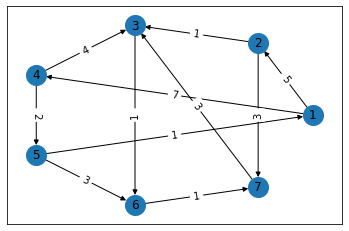

In [2]:
def get_matrix(filename):
    with open(filename, "r", encoding = "utf-8") as file:
        mtrx = [[int(num) for num in line.split(" ")] for line in file]
        for i in range(len(mtrx)):
            for j in range(len(mtrx)):
                if mtrx[i][j] == 0:
                    mtrx[i][j] = math.inf
    return mtrx

def get_graph(mtrx):
    G = nx.DiGraph()
    for i in range(1, len(mtrx)):
        G.add_node(i)
    for i in range(len(mtrx)):
        for j in range(len(mtrx)):
            if mtrx[i][j] != math.inf:
                G.add_edge(i+1, j+1, weight = mtrx[i][j], label = mtrx[i][j])
    return G
    
mtrx = get_matrix('C:\\Users\\User\\Desktop\\jupyter_note\\labs\\lab6txt\\matrix.txt')
G = get_graph(mtrx)

pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=400, arrows=True)

weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)
plt.show()

In [3]:
def draw_graph(G, path, start, end):
    pos = nx.circular_layout(G)
    pos1 = copy.copy(pos)
    G1 = copy.deepcopy(G)
    pos2 = copy.copy(pos)
    G2 = copy.deepcopy(G)
    hlp = []
    hlp.append(start)
    hlp.append(end)
    
    for key in pos:
        if not key in path:
            del pos1[key]
        if not key in hlp:
            del pos2[key]
            
    for i in range(len(G)):
        if not i+1 in path:
            G1.remove_node(i+1)
        if not (i+1) in hlp:
            G2.remove_node(i+1)
            
    nx.draw(G, pos, with_labels = True, node_size=400, arrows=True)
    nx.draw(G1, pos1, with_labels = True, node_size=400, arrows=True, node_color='green', edge_color='green')
    nx.draw(G2, pos2, with_labels = True, node_size=400, arrows=True, node_color = 'green')
    
    weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)

### Алгоритм Флойда-Уоршелла

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 3
[1, 2, 3]


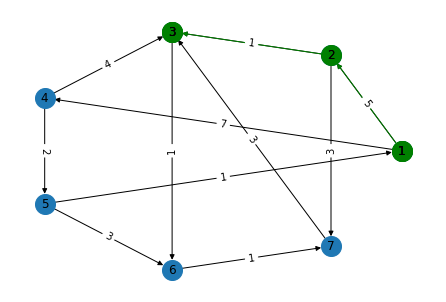

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 6
[1, 2, 3, 6]


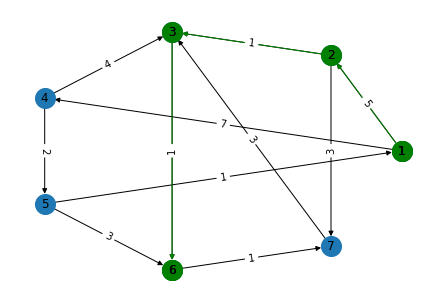

,Выполнение алгоритма в мс,Количество вершин
0,0.2151,3
1,0.2315,4


In [4]:
def get_path(P, start, end):
    start -= 1
    end -= 1
    result = []
    result.append(start)
    while start != end:
        start = P[start][end]
        result.append(start)
    result = [el + 1 for el in result]
    return result

def FloydWarshall(mtrx):
    M = copy.deepcopy(mtrx)
    P = [[0 for i in range(len(M))] for j in range(len(M))]
    
    # заносим в матрицу путей все значения кроме inf
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i][j] != math.inf:
                P[i][j] = j
                
    # ищем кратчайший путь
    for i in range(len(M)):
        for j in range(len(M)):
            if i == j: continue
            if M[i][j] != math.inf:
                for k in range(len(M)):
                    if i == k or j == k: continue
                    if M[i][k] > M[i][j] + M[j][k]:
                        M[i][k] = M[i][j] + M[j][k]
                        P[i][k] = P[i][j]
    return (M, P)


answer = []
for i in range(2):
    data = []
    print('Хотите найти кратчайший путь? Введите yes или no')
    s = (input())
    if s == 'yes':
        start = int(input('Введите номер отправной вершины: '))
        end = int(input('Введите номер конечной вершины: '))
        
        start_time = time.perf_counter()
        result = FloydWarshall(mtrx)
        path = get_path(result[1], start, end)
        data.append(((time.perf_counter() - start_time)*1000))
        
        print(path)
        data.append(len(path))
        answer.append(data)
        
        G = get_graph(mtrx)
        draw_graph(G, path, start, end)
        plt.show()
    
    elif s == 'no':
        break

pd.DataFrame(answer, columns = ["Выполнение алгоритма в мс", "Количество вершин"])

### Алгоритм Дейкстры

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 3
[1, 2, 3]


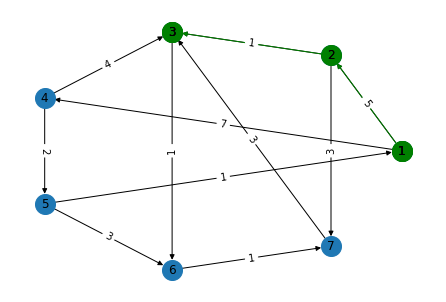

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 6
[1, 2, 3, 6]


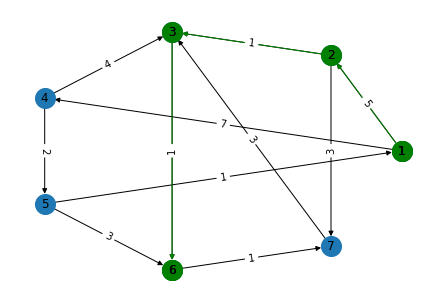

,Выполнение алгоритма в мс,Количество вершин
0,0.1653,3
1,0.1554,4


In [5]:
def Dijkstra(mtrx, start, end):
    M = copy.deepcopy(mtrx)
    n = len(M)
    start -= 1
    end -= 1
    
    # ставим 'метки' — минимальные известные расстояния от начальной вершины
    D = [M[start][i] for i in range(n)] 
    D[start] = 0
    P = [[start] for i in range(n)]
    checked_nodes = {start} # словарь пройденных вершин
    
    for i in range(n):
        temp_min = math.inf # задаем минимальное расстояние inf
        node = None
        
        # ищем минимальное расстояние, вносим вершину в пройденную
        for j in range(n):
            if D[j] < temp_min and j not in checked_nodes:
                temp_min = D[j]
                node = j
                checked_nodes.add(node)
        
        # если полученное значение длины меньше значения метки соседа, 
        # заменим значение метки полученным значением длины
        if node is not None:
            for k in range(n):
                if D[k] > M[node][k] + D[node]:
                    D[k] = M[node][k] + D[node]
                    P[k] = copy.deepcopy(P[node])
                    P[k].append(node)
        else:
            break
                    
    for i in range(n):
        if D[i] != math.inf and P[i][0] != i:
            P[i].append(i)   
    if D[end] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[end]]
    return (D, path, P)


answer = []
for i in range(2):
    data = []
    print('Хотите найти кратчайший путь? Введите yes или no')
    s = (input())
    if s == 'yes':
        start = int(input('Введите номер отправной вершины: '))
        end = int(input('Введите номер конечной вершины: '))
        
        start_time = time.perf_counter()
        result = Dijkstra(mtrx, start, end)
        path = result[1]
        data.append(((time.perf_counter() - start_time)*1000))
        
        print(path)
        data.append(len(path))
        answer.append(data)
        
        G = get_graph(mtrx)
        draw_graph(G, path, start, end)
        plt.show()
    
    elif s == 'no':
        break

pd.DataFrame(answer, columns = ["Выполнение алгоритма в мс", "Количество вершин"])

###  Алгоритм Беллмана-Форда

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 3
[1, 2, 3]


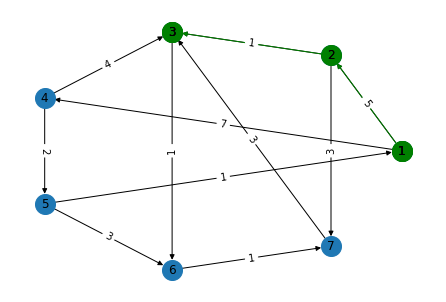

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 6
[1, 2, 3, 6]


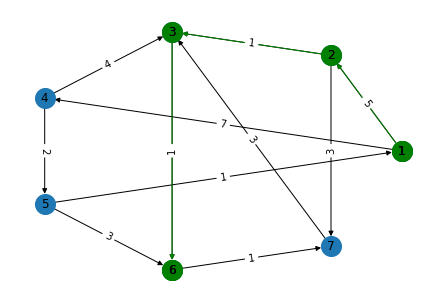

,Выполнение алгоритма в мс,Количество вершин
0,0.2456,3
1,0.2411,4


In [6]:
def BellmanFord(mtrx, start, end):
    n = len(mtrx)
    start -= 1
    end -= 1
    
    # расстояния (inf) от исходной вершины до всех остальных, кроме start
    A = [[math.inf for i in range(n)] for j in range(n)] 
    A[0][start] = 0
    P = [[start] for i in range(n)]
    
    for k in range(1, n):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(n):
            for j in range(n):
                if mtrx[i][j] != math.inf:    
                    # вычисляем самые короткие расстояния, если надо - меняем их
                    if A[k][j] > A[k-1][i] + mtrx[i][j]:
                        A[k][j] = A[k-1][i] + mtrx[i][j]
                        P[j] = copy.deepcopy(P[i])
                        P[j].append(j)
    
    if A[-1][end] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[end]]
    return (A[-1], path, P)


answer = []
for i in range(2):
    data = []
    print('Хотите найти кратчайший путь? Введите yes или no')
    s = (input())
    if s == 'yes':
        start = int(input('Введите номер отправной вершины: '))
        end = int(input('Введите номер конечной вершины: '))
        
        start_time = time.perf_counter()
        result = BellmanFord(mtrx, start, end)
        path = result[1]
        data.append(((time.perf_counter() - start_time)*1000))
        
        print(path)
        data.append(len(path))
        answer.append(data)
        
        G = get_graph(mtrx)
        draw_graph(G, path, start, end)
        plt.show()
    
    elif s == 'no':
        break

pd.DataFrame(answer, columns = ["Выполнение алгоритма в мс", "Количество вершин"])

### Алгоритм Джонсона

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 3
[1, 2, 3]


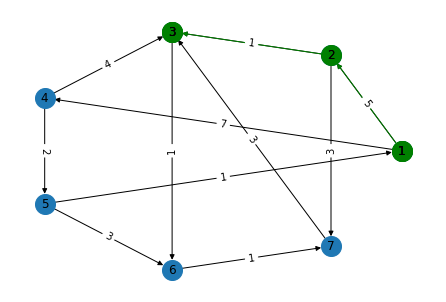

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 6
[1, 2, 3, 6]


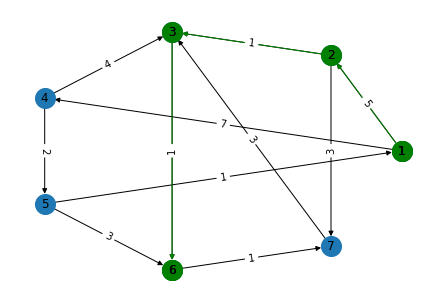

,Выполнение алгоритма в мс,Количество вершин
0,1.3048,3
1,1.2472,4


In [7]:
def Johnson(mtrx, start, end):
    start -= 1
    end -= 1
    A = copy.deepcopy(mtrx)
    M = copy.deepcopy(mtrx)
    n = len(M)
    
    # cтроим доп вершину, которая соединяется со всеми другими (значение - inf)
    for i in range(n):
        A[i].append(math.inf)
    A.append([0 for i in range(n+1)])
    
    # вычисляем расстояние от новой вершины до остальных 
    temp_res = BellmanFord(A, n+1, 1)
    
    # изменяем веса дуг, используя значения полученных кратчайших путей
    for i in range(n):
        for j in range(n):
            if M[i][j] != math.inf and temp_res[0][i] != math.inf and temp_res[0][j] != math.inf:
                M[i][j] += temp_res[0][i] - temp_res[0][j]
    D = []
    P = []
    
    # из каждой вершины запускаем алгоритм Дейкстры для составления искомой матрицы
    for i in range(n):
        dijkstra_res = Dijkstra(M, i+1, i+1)
        D.append(dijkstra_res[0])
        P.append(dijkstra_res[2])
    for i in range(n):
        for j in range(n):
            if D[i][j] != math.inf and temp_res[0][i] != math.inf and temp_res[0][j] != math.inf:
                D[i][j] += temp_res[0][j] - temp_res[0][i]
    
    return (D, [el + 1 for el in P[start][end]], P)


answer = []
for i in range(2):
    data = []
    print('Хотите найти кратчайший путь? Введите yes или no')
    s = (input())
    if s == 'yes':
        start = int(input('Введите номер отправной вершины: '))
        end = int(input('Введите номер конечной вершины: '))
        
        start_time = time.perf_counter()
        result = Johnson(mtrx, start, end)
        path = result[1]
        data.append(((time.perf_counter() - start_time)*1000))
        
        print(path)
        data.append(len(path))
        answer.append(data)
        
        G = get_graph(mtrx)
        draw_graph(G, path, start, end)
        plt.show()
    
    elif s == 'no':
        break

pd.DataFrame(answer, columns = ["Выполнение алгоритма в мс", "Количество вершин"])

### Алгоритм Левита

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 3
[1, 2, 3]


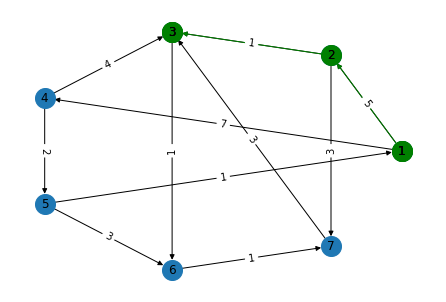

Хотите найти кратчайший путь? Введите yes или no
yes
Введите номер отправной вершины: 1
Введите номер конечной вершины: 6
[1, 2, 3, 6]


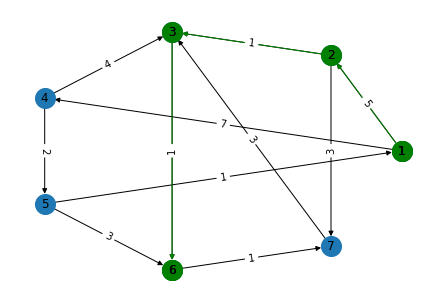

,Выполнение алгоритма в мс,Количество вершин
0,0.2262,3
1,0.2312,4


In [8]:
def Levit(matrix, start, end):
    start -= 1
    end -= 1
    M = copy.deepcopy(mtrx)
    n = len(M)
    P = [[start] for i in range(n)] # массив изначально кратчайших путей
    D = [math.inf for i in range(n)] # массив для будущих кратчайших путей
    D[start] = 0
    
    # вершины, расстояние до которых уже вычислено
    m0 = set() 
    # вершины, расстояние до которых вычисляется
    m1 = {"main_queue" : [start], "priority_queue": []} 
    # вершины, расстояние до которых ещё не вычислено
    m2 = set(range(n)) 
    m2.remove(start)
    
    # на каждом шаге алгоритма мы берём вершину из множества m1
    while len(m1["main_queue"]) or len(m1["priority_queue"]):
        if len(m1["priority_queue"]):
            cur_node = m1["priority_queue"].pop(0)
        else:
            cur_node = m1["main_queue"].pop(0)
        
        for temp_node in range(n):
            if D[temp_node] == math.inf and M[cur_node][temp_node] == math.inf:
                continue
                
            # если второй конец текущего ребра принадлежит m2, то переносим его во множество m1
            if temp_node in m2:
                m2.remove(temp_node)
                distance = D[cur_node] + M[cur_node][temp_node]
                if distance < D[temp_node]:
                    D[temp_node] = distance
                    P[temp_node] = copy.deepcopy(P[cur_node])
                    P[temp_node].append(temp_node)
                m1["main_queue"].append(temp_node)
            
            # если второй конец текущего ребра принадлежит m1, то пытаемся улучшить значение
            elif temp_node in m1["main_queue"] or temp_node in m1["priority_queue"]:
                distance = D[cur_node] + M[cur_node][temp_node]
                if distance < D[temp_node]:
                    D[temp_node] = distance
                    P[temp_node] = copy.deepcopy(P[cur_node])
                    P[temp_node].append(temp_node)
            
            # если второй конец текущего ребра принадлежит m0 и его расстояние можно улучшить в массиве D, 
            # то улучшаем, а вершину возвращаем в m1
            elif temp_node in m0 and D[temp_node] > D[cur_node] + M[cur_node][temp_node]:
                m0.remove(temp_node)
                m1["priority_queue"].append(temp_node)
                distance = D[cur_node] + M[cur_node][temp_node]
                if distance < D[temp_node]:
                    D[temp_node] = distance
                    P[temp_node] = copy.deepcopy(P[cur_node])
                    P[temp_node].append(temp_node)
        m0.add(cur_node)
    
    return D, [el + 1 for el in P[end]], P


answer = []
for i in range(2):
    data = []
    print('Хотите найти кратчайший путь? Введите yes или no')
    s = (input())
    if s == 'yes':
        start = int(input('Введите номер отправной вершины: '))
        end = int(input('Введите номер конечной вершины: '))
        
        start_time = time.perf_counter()
        result = Levit(mtrx, start, end)
        path = result[1]
        data.append(((time.perf_counter() - start_time)*1000))
        
        print(path)
        data.append(len(path))
        answer.append(data)
        
        G = get_graph(mtrx)
        draw_graph(G, path, start, end)
        plt.show()
    
    elif s == 'no':
        break

pd.DataFrame(answer, columns = ["Выполнение алгоритма в мс", "Количество вершин"])

### Алгоритм Йена

Введите номер количества путей для поиска: 2
Введите номер отправной вершины: 5
Введите номер конечной вершины: 7
[5, 6, 7]
4


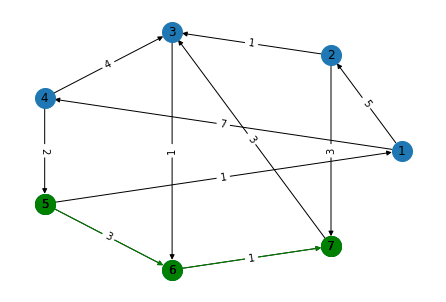

Введите номер отправной вершины: 5
Введите номер конечной вершины: 7
[5, 1, 2, 7]
9


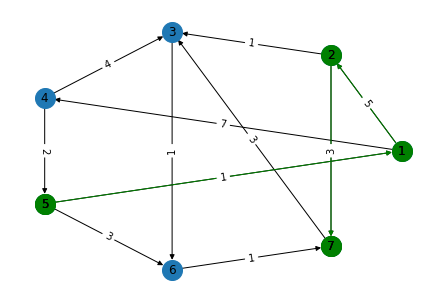

,Выполнение алгоритма в мс,Количество вершин
0,0.336,3
1,0.224,4


In [9]:
def Yen(g, start, end, n):
    # определяем первый кратчайший путь и его значение
    A = [nx.dijkstra_path(g, start, end)]
    A_value = [nx.dijkstra_path_length(g, start, end)]

    B = queue.PriorityQueue() # кандидаты

    for k in range(1, n):
        # узел ветвления (от которого будем искать новый кратчайший путь)
        # в диапазоне от первого узла до последнего в предыдущем k-кратчайшем пути
        for i in range(len(A[k - 1]) - 1):
            # узел ветвления получаем из предыдущего кратчайшего пути
            node = A[k - 1][i]
            # корневой путь - последовательность узлов от start до узла ветвления
            root_path = A[k - 1][:i]
            removed_edges = []

            for path in A:
                # удаляем ребро, которое является чатью предыдущего кратчайшего пути и корневого пути
                if len(path)-1 > i and root_path == path[:i] and G.has_edge(path[i], path[i+1]):
                    edge_weight = g.edges[path[i], path[i+1]]['weight']
                    removed_edges.append((path[i], path[i+1], edge_weight))
                    g.remove_edge(path[i], path[i+1])

            # если есть путь от узла до конца 
            if nx.has_path(g, node, end):
                spur_path = nx.dijkstra_path(g, node, end)
                
                # формируем новый путь от start до end
                total_path = root_path + spur_path
                total_path_cost = nx.dijkstra_path_length(g, total_path[0], total_path[-1])
                
                # добавляем в список кандидатов
                B.put((total_path_cost, total_path))
                
            # восстанавливаем удалённые рёбра
            g.add_weighted_edges_from(removed_edges)

        # так как кандидаты - приоритетная очередь, то они уже отсортированы
        # находим наименьший путь из кандидатов и добавляем в кратчайшие пути и их значения
        while not B.empty():
            cost_, path_ = B.get()
            if path_ not in A:
                A.append(path_)
                A_value.append(cost_)
                break

    return A, A_value

num = int(input('Введите номер количества путей для поиска: '))        
for i in range(num):
    start = int(input('Введите номер отправной вершины: '))
    end = int(input('Введите номер конечной вершины: '))
    path, value = Yen(G, start, end, num)
    print(path[i])
    print(value[i])       
   
    G = get_graph(mtrx)
    draw_graph(G, path[i], start, end)
    plt.show()
        
df = pd.DataFrame({
    'Выполнение алгоритма в мс':[0.336, 0.224], 
    'Количество вершин':[3, 4]
})
df

### Вывод

В ходе лабораторной работы мы реализовали алгоритмы поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа. После замера временной сложности работы каждого из алгоритмов в зависимости от числа узлов было выяснено, что самым быстрым является алгоритм Дейкстры.